In [16]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [39]:
def plot_cv(a):
    cv2.imshow('image',a)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
path = '../Data/CBIS-DDSM_classification_orient/'

In [9]:
img_list = sorted(os.listdir(path))

In [11]:
a = cv2.imread(os.path.join(path,img_list[1]))

In [12]:
a.shape

(4616, 3016, 3)

In [14]:
a = cv2.resize(a,(256,320))

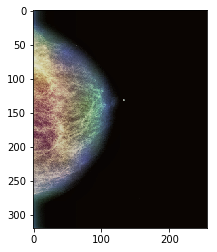

In [17]:
plt.imshow(a)

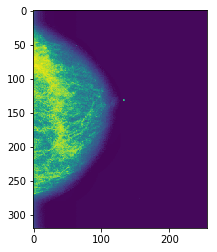

In [30]:
plt.imshow(a[:,:,0])

In [45]:
m = cv2.medianBlur(a[:,:,0],5)

In [46]:
m[m<150] = 0
m[m>150] = 255

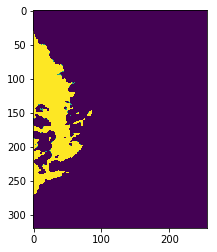

In [47]:
plt.imshow(m)

In [49]:
plot_cv(cv2.bilateralFilter(a[:,:,0],5,100,100))

In [53]:
im = cv2.bilateralFilter(a[:,:,0],5,100,100)
_,im = cv2.threshold(im,120,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [56]:
im = cv2.bilateralFilter(a[:,:,0],5,100,100)
im = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

In [57]:
plot_cv(im)

In [31]:
c = a[:,:,0]

In [32]:
c.max()

229

In [37]:
d = np.zeros(c.shape)
d[c>c.mean()+2*c.std()] = 255

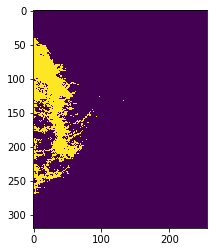

In [38]:
plt.imshow(d)

In [21]:
b = ((a*a*a).sum(axis=2))**(1/3)

In [25]:
b

array([[6.93823207, 7.91578322, 8.35390473, ..., 7.1465695 , 7.1465695 ,
        7.1465695 ],
       [6.6038545 , 7.37419794, 6.17100579, ..., 7.1465695 , 7.1465695 ,
        7.1465695 ],
       [7.76393608, 6.7017594 , 6.77516895, ..., 7.1465695 , 7.1465695 ,
        7.1465695 ],
       ...,
       [6.88941877, 7.3495966 , 6.93823207, ..., 7.1465695 , 7.1465695 ,
        7.1465695 ],
       [7.04729873, 6.58853227, 7.35576237, ..., 7.1465695 , 7.1465695 ,
        7.1465695 ],
       [6.2827613 , 6.95205329, 4.36207067, ..., 7.1465695 , 7.1465695 ,
        7.1465695 ]])

In [22]:
b.shape

(320, 256)

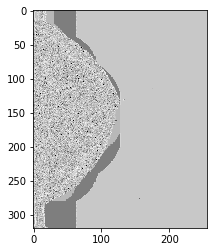

In [24]:
plt.imshow(b,cmap='gray')